# User integration with Jupyter
Ref: [StackOverflow: 31610889](https://stackoverflow.com/questions/31610889/how-to-copy-paste-dataframe-from-stackoverflow-into-python)

## Make a Jupyter output data into a python dataframe

In [2]:
# Ctrl+C the table output (say 0-3 records of the table above)
# Run this...
import pandas as pd

df_from_pd = pd.read_clipboard()
df_from_pd

Date Type   Qty     Scoop     Flavour
0   6-Oct-17    A  20.0  Flavour1  Strawberry
1  10-Oct-17    B   9.9  Flavour1     Vanilla
2  10-Oct-17    B   9.9  Flavour2       Lemon

## Convert Table from Excel via clipboard into a python dictionary array

In [3]:
# Copy the data of interest - with headers - into clipboard with Ctrl+C
# Run this...
import pandas as pd

## Copy the Excel table to the clipboard first.
the_dict = pd.read_clipboard().to_dict('records')
the_dict

[{'List Date': 20180524,
  'Name': 'S&P 100 Index (American style)',
  'Product Type': 'Index, pm-settled, cash'},
 {'List Date': 20180524,
  'Name': 'S&P 100 Index (European style)',
  'Product Type': 'Index, pm-settled, cash'}]

In [4]:
# The clipboard from Excel has the following:
pd.read_clipboard()

Name             Product Type  List Date
0  S&P 100 Index (American style)  Index, pm-settled, cash   20180524
1  S&P 100 Index (European style)  Index, pm-settled, cash   20180524

# Filtering rows based on conditions from other columns
**Ref**: Data School Videos:
1. [How do I filter rows of a pandas DataFrame by column value?](https://www.youtube.com/watch?v=2AFGPdNn4FM)
2. [How do I apply multiple filter criteria to a pandas DataFrame?](https://www.youtube.com/watch?v=YPItfQ87qjM&t=5s)
3. [loc / iloc How do I select multiple rows and columns from a pandas DataFrame?](https://www.youtube.com/watch?v=xvpNA7bC8cs&t=488s)


In [1]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

# Single column condition
drinks[drinks["continent"] == 'Asia']

# Multiple conditions from a single column
drinks[drinks.continent.isin(['Asia', 'Africa'])]   #!!! BE MINDFUL OF TEXT WITH SPACES.

### Criteria from multiple columns
# Single conditions per column
drinks[(drinks["continent"] == 'Asia') & (drinks["beer_servings"] > 100)]

# Mix of single and multiple conditions per column
# Beer servings > 100 in Asia or Africa, but not in Vietnam
drinks[drinks.continent.isin(['Asia', 'Africa']) & (drinks.beer_servings > 100) & ~(drinks.country == 'Vietnam')]

country  beer_servings  spirit_servings  wine_servings  \
4                Angola            217               57             45   
22             Botswana            173               35             35   
29           Cabo Verde            144               56             16   
31             Cameroon            147                1              4   
62                Gabon            347               98             59   
87           Kazakhstan            124              246             12   
117             Namibia            376                3              1   
138         South Korea            140               16              9   
141  Russian Federation            247              326             73   
152          Seychelles            157               25             51   
159        South Africa            225               76             81   

     total_litres_of_pure_alcohol continent  
4                             5.9    Africa  
22                            5.4    Africa  
29                            4.0    Africa  
31                            5.8    Africa  
62                            8.9    Africa  
87                            6.8      Asia  
117                           6.8    Africa  
138                           9.8      Asia  
141                          11.5      Asia  
152                           4.1    Africa  
159                           8.2    Africa

In [2]:
# Multiple sub-string search
# Countries in Asia and Africa having the letter 's' or 'w' in them with beer_servings > 100
continent = ['Asia', 'Africa']
searchfor = ['s', 'w']
drinks[drinks.country.str.contains('|'.join(searchfor), case=False) & 
       drinks.continent.isin(continent) & 
       (drinks.beer_servings > 100)]

country  beer_servings  spirit_servings  wine_servings  \
22             Botswana            173               35             35   
87           Kazakhstan            124              246             12   
138         South Korea            140               16              9   
141  Russian Federation            247              326             73   
152          Seychelles            157               25             51   
159        South Africa            225               76             81   

     total_litres_of_pure_alcohol continent  
22                            5.4    Africa  
87                            6.8      Asia  
138                           9.8      Asia  
141                          11.5      Asia  
152                           4.1    Africa  
159                           8.2    Africa

# Merging 2D x 1D arrays of different length

Ref: [Stackoverflow: 30598281](https://stackoverflow.com/questions/30597260/merging-a-dataframe-with-a-series/30598281)

The task is to repeat rows in the 2D array for values in the 1D array

In [3]:
## Merging a 2 dimensional master array with a one dimensional date series

import pandas as pd
import numpy as np
from datetime import date

# Create a 3 x 4 master dataframe
df = pd.DataFrame(np.random.randn(3,4), columns = list('ABCD'))
df

A         B         C         D
0  1.349480 -1.264661 -0.019623 -1.464625
1  0.772565  0.269452  0.073671 -0.034632
2  0.036295 -0.138218  1.195414 -0.381390

In [4]:
# Insert a key into the master dataframe
df['key'] = 0
df

A         B         C         D  key
0  1.349480 -1.264661 -0.019623 -1.464625    0
1  0.772565  0.269452  0.073671 -0.034632    0
2  0.036295 -0.138218  1.195414 -0.381390    0

In [5]:
# Create a 2 x 1 date series
dates = pd.date_range(date.today(), periods=2)
dates

DatetimeIndex(['2018-03-22', '2018-03-23'], dtype='datetime64[ns]', freq='D')

In [6]:
# make the date series into a dataframe with the key 
ser = pd.DataFrame({'By': dates, 'key':[0] * len(dates)})
ser

By  key
0 2018-03-22    0
1 2018-03-23    0

In [7]:
# merge the master dataframe and the dataseries dataframe over the key and drop the key. 
result = pd.merge(df, ser, on = 'key').drop('key', axis = 1)
result

A         B         C         D         By
0  1.349480 -1.264661 -0.019623 -1.464625 2018-03-22
1  1.349480 -1.264661 -0.019623 -1.464625 2018-03-23
2  0.772565  0.269452  0.073671 -0.034632 2018-03-22
3  0.772565  0.269452  0.073671 -0.034632 2018-03-23
4  0.036295 -0.138218  1.195414 -0.381390 2018-03-22
5  0.036295 -0.138218  1.195414 -0.381390 2018-03-23

# Lookup if date is between two dates from another dataframe
The following lookup code evaluates if dates are between two dates and extracts the associated text (Weeknumber)

In [8]:
import pandas as pd, numpy as np
dates = pd.date_range('20180101', periods=21)
week_start = pd.date_range('20180101', periods=3, freq='W-Mon')
week_end = pd.date_range('20180101', periods=3, freq='W-Sun')
week = pd.Series(['W1', 'W2', 'W3'])
df1 = pd.DataFrame({'By': dates, 
                    'SerNo': np.random.randint(5, size=21)})
df2 = pd.DataFrame({'Start': week_start,
                    'End': week_end,
                    'Week': week})

In [9]:
# Text of the week
week

0    W1
1    W2
2    W3
dtype: object

In [10]:
# Weekends
week_end

DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21'], dtype='datetime64[ns]', freq='W-SUN')

In [11]:
# Dataframe of dates (contains 21 values)
df1.loc[0:8,['SerNo', 'By']]

SerNo         By
0      4 2018-01-01
1      2 2018-01-02
2      1 2018-01-03
3      3 2018-01-04
4      4 2018-01-05
5      4 2018-01-06
6      4 2018-01-07
7      3 2018-01-08
8      2 2018-01-09

In [12]:
# Dataframe of weekly buckets
df2[['Start', 'End', 'Week']]

Start        End Week
0 2018-01-01 2018-01-07   W1
1 2018-01-08 2018-01-14   W2
2 2018-01-15 2018-01-21   W3

In [13]:
# Array with Interval index of the weeks
idx = pd.IntervalIndex.from_arrays(df2.Start, df2.End, closed='both')
idx

IntervalIndex([[2018-01-01, 2018-01-07], [2018-01-08, 2018-01-14], [2018-01-15, 2018-01-21]]
              closed='both',
              dtype='interval[datetime64[ns]]')

In [14]:
week = df2.loc[idx.get_indexer(df1.By), 'Week']
week[0:10]

0    W1
0    W1
0    W1
0    W1
0    W1
0    W1
0    W1
1    W2
1    W2
1    W2
Name: Week, dtype: object

In [15]:
df1['Week'] = week.values
df1.loc[0:10, ['SerNo', 'By', 'Week']]

SerNo         By Week
0       4 2018-01-01   W1
1       2 2018-01-02   W1
2       1 2018-01-03   W1
3       3 2018-01-04   W1
4       4 2018-01-05   W1
5       4 2018-01-06   W1
6       4 2018-01-07   W1
7       3 2018-01-08   W2
8       2 2018-01-09   W2
9       4 2018-01-10   W2
10      1 2018-01-11   W2

# Lookup between two arrays and add records to master
Ref: [StackOverflow: 46597513](https://stackoverflow.com/questions/46597513/splitting-order-quantities-by-type-and-scoop)

In [16]:
import pandas as pd
import numpy as np # This is required for indexing to ignore. Find+Replace nan to np.nan

ask = [{'Date': '6-Oct-17', 'Qty': 80.0, 'Scoop': 'Single', 'Type': 'A'},
 {'Date': '10-Oct-17', 'Qty': 90.0, 'Scoop': 'Triple', 'Type': 'B'},
 {'Date': '9-Oct-17', 'Qty': 40.0, 'Scoop': 'Double', 'Type': 'D'},
 {'Date': '10-Oct-17', 'Qty': 20.0, 'Scoop': 'Double', 'Type': 'C'},
 {'Date': '10-Oct-17', 'Qty': 90.0, 'Scoop': 'Triple', 'Type': 'B'},
 {'Date': '9-Oct-17', 'Qty': 30.0, 'Scoop': 'Single', 'Type': 'A'}]

ask = pd.DataFrame(ask)
ask

Date   Qty   Scoop Type
0   6-Oct-17  80.0  Single    A
1  10-Oct-17  90.0  Triple    B
2   9-Oct-17  40.0  Double    D
3  10-Oct-17  20.0  Double    C
4  10-Oct-17  90.0  Triple    B
5   9-Oct-17  30.0  Single    A

In [17]:
icecream = [{'Flavour1': 'Strawberry',
  'Flavour2': np.nan,
  'Flavour3': np.nan,
  'Proportion': 0.25,
  'Scoop': 'Single',
  'Scoops/Tub': 4,
  'Type': 'A'},
 {'Flavour1': 'Banana',
  'Flavour2': 'Lemon',
  'Flavour3': np.nan,
  'Proportion': 0.25,
  'Scoop': 'Double',
  'Scoops/Tub': 2,
  'Type': 'C'},
 {'Flavour1': 'Vanilla',
  'Flavour2': 'Lemon',
  'Flavour3': 'Mint',
  'Proportion': 0.11,
  'Scoop': 'Triple',
  'Scoops/Tub': 3,
  'Type': 'B'},
 {'Flavour1': 'Chocolate',
  'Flavour2': 'Vanilla',
  'Flavour3': np.nan,
  'Proportion': 0.1,
  'Scoop': 'Double',
  'Scoops/Tub': 5,
  'Type': 'D'}]

icecream = pd.DataFrame(icecream)
icecream

Flavour1 Flavour2 Flavour3  Proportion   Scoop  Scoops/Tub Type
0  Strawberry      NaN      NaN        0.25  Single           4    A
1      Banana    Lemon      NaN        0.25  Double           2    C
2     Vanilla    Lemon     Mint        0.11  Triple           3    B
3   Chocolate  Vanilla      NaN        0.10  Double           5    D

In [18]:
tub=ask.merge(icecream.drop('Scoop',1),on='Type',how='left')
tub

Date   Qty   Scoop Type    Flavour1 Flavour2 Flavour3  Proportion  \
0   6-Oct-17  80.0  Single    A  Strawberry      NaN      NaN        0.25   
1  10-Oct-17  90.0  Triple    B     Vanilla    Lemon     Mint        0.11   
2   9-Oct-17  40.0  Double    D   Chocolate  Vanilla      NaN        0.10   
3  10-Oct-17  20.0  Double    C      Banana    Lemon      NaN        0.25   
4  10-Oct-17  90.0  Triple    B     Vanilla    Lemon     Mint        0.11   
5   9-Oct-17  30.0  Single    A  Strawberry      NaN      NaN        0.25   

   Scoops/Tub  
0           4  
1           3  
2           5  
3           2  
4           3  
5           4

In [19]:
tub=tub.set_index(['Date','Type','Scoop','Qty','Scoops/Tub','Proportion']).stack().reset_index()
tub

Date Type   Scoop   Qty  Scoops/Tub  Proportion   level_6           0
0    6-Oct-17    A  Single  80.0           4        0.25  Flavour1  Strawberry
1   10-Oct-17    B  Triple  90.0           3        0.11  Flavour1     Vanilla
2   10-Oct-17    B  Triple  90.0           3        0.11  Flavour2       Lemon
3   10-Oct-17    B  Triple  90.0           3        0.11  Flavour3        Mint
4    9-Oct-17    D  Double  40.0           5        0.10  Flavour1   Chocolate
5    9-Oct-17    D  Double  40.0           5        0.10  Flavour2     Vanilla
6   10-Oct-17    C  Double  20.0           2        0.25  Flavour1      Banana
7   10-Oct-17    C  Double  20.0           2        0.25  Flavour2       Lemon
8   10-Oct-17    B  Triple  90.0           3        0.11  Flavour1     Vanilla
9   10-Oct-17    B  Triple  90.0           3        0.11  Flavour2       Lemon
10  10-Oct-17    B  Triple  90.0           3        0.11  Flavour3        Mint
11   9-Oct-17    A  Single  30.0           4        0.25  Flavour1  Strawberry

In [20]:
tub['Qty']=tub['Qty']*tub['Proportion']
tub

Date Type   Scoop   Qty  Scoops/Tub  Proportion   level_6           0
0    6-Oct-17    A  Single  20.0           4        0.25  Flavour1  Strawberry
1   10-Oct-17    B  Triple   9.9           3        0.11  Flavour1     Vanilla
2   10-Oct-17    B  Triple   9.9           3        0.11  Flavour2       Lemon
3   10-Oct-17    B  Triple   9.9           3        0.11  Flavour3        Mint
4    9-Oct-17    D  Double   4.0           5        0.10  Flavour1   Chocolate
5    9-Oct-17    D  Double   4.0           5        0.10  Flavour2     Vanilla
6   10-Oct-17    C  Double   5.0           2        0.25  Flavour1      Banana
7   10-Oct-17    C  Double   5.0           2        0.25  Flavour2       Lemon
8   10-Oct-17    B  Triple   9.9           3        0.11  Flavour1     Vanilla
9   10-Oct-17    B  Triple   9.9           3        0.11  Flavour2       Lemon
10  10-Oct-17    B  Triple   9.9           3        0.11  Flavour3        Mint
11   9-Oct-17    A  Single   7.5           4        0.25  Flavour1  Strawberry

In [21]:
tub=tub.drop(['Scoops/Tub','Proportion','Scoop'],1).rename(columns={'level_6':'Scoop',0:'Flavour'})
tub

Date Type   Qty     Scoop     Flavour
0    6-Oct-17    A  20.0  Flavour1  Strawberry
1   10-Oct-17    B   9.9  Flavour1     Vanilla
2   10-Oct-17    B   9.9  Flavour2       Lemon
3   10-Oct-17    B   9.9  Flavour3        Mint
4    9-Oct-17    D   4.0  Flavour1   Chocolate
5    9-Oct-17    D   4.0  Flavour2     Vanilla
6   10-Oct-17    C   5.0  Flavour1      Banana
7   10-Oct-17    C   5.0  Flavour2       Lemon
8   10-Oct-17    B   9.9  Flavour1     Vanilla
9   10-Oct-17    B   9.9  Flavour2       Lemon
10  10-Oct-17    B   9.9  Flavour3        Mint
11   9-Oct-17    A   7.5  Flavour1  Strawberry

# Check if a date is inside or outside a specified date range

In [26]:
# Check if a date is inside or outside a specified date range column
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': pd.date_range('20170101', periods=10),
                    'B': pd.date_range('20170101', '20170310', freq="W-Fri"),
                    'C': pd.Timestamp('20170108')}); df
                
# df['Inside'] = np.where( (df['B'] > df['A']) & (df['B'] < df['C']), 'In' , 'Out'); df
df['Inside'] = np.where( (df['B'] > df['A']) & (df['B'] < df['C']), df['B'] - df['A'] , df['A'] - df['A']); df

A          B          C Inside
0 2017-01-01 2017-01-06 2017-01-08 5 days
1 2017-01-02 2017-01-13 2017-01-08 0 days
2 2017-01-03 2017-01-20 2017-01-08 0 days
3 2017-01-04 2017-01-27 2017-01-08 0 days
4 2017-01-05 2017-02-03 2017-01-08 0 days
5 2017-01-06 2017-02-10 2017-01-08 0 days
6 2017-01-07 2017-02-17 2017-01-08 0 days
7 2017-01-08 2017-02-24 2017-01-08 0 days
8 2017-01-09 2017-03-03 2017-01-08 0 days
9 2017-01-10 2017-03-10 2017-01-08 0 days

# Build arrays for sample data

In [1]:
import numpy as np
np.empty((3,2))

array([[1.15280939e-311, 1.15280939e-311],
       [1.15280938e-311, 1.15280939e-311],
       [1.15280939e-311, 1.15280939e-311]])

In [28]:
np.full((2,2),7)

array([[7, 7],
       [7, 7]])

In [29]:
np.arange(10,25,5)

array([10, 15, 20])

In [30]:
np.linspace(0,2,9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [31]:
np.arange(0,2,9)

array([0])

In [32]:
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [33]:
np.random.random((5,5))*np.identity(5)

array([[ 0.85645477,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.77764032,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.66091001,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.18323735,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.51126476]])

In [11]:
np.random.lognormal(mean=0, sigma=1, size=5)

array([0.91451458, 1.09888063, 1.51211738, 0.45926729, 1.16658068])

# Group By

In [34]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

grouped = df.groupby(['A', 'B'])
grouped.last()

C         D
A   B                        
bar one   -0.772346 -0.284711
    three -3.195753 -0.135773
    two    0.104124  0.964093
foo one    0.921606  0.166225
    three  0.576626  1.033141
    two   -0.002207 -2.588266

# Extract Ticker symbols of S&P 500

In [9]:
import pandas as pd

url = https.urlopen('GET', 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
symbols_table = pd.read_html(url.data, header=0)[0]
symbols = list(symbols_table.loc[:, "Ticker symbol"])
symbols_table.head()

Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV          AbbVie Inc.     reports             Health Care   
3          ABMD          ABIOMED Inc     reports             Health Care   
4           ACN        Accenture plc     reports  Information Technology   

                GICS Sub Industry                 Location  \
0        Industrial Conglomerates      St. Paul, Minnesota   
1           Health Care Equipment  North Chicago, Illinois   
2                 Pharmaceuticals  North Chicago, Illinois   
3           Health Care Equipment   Danvers, Massachusetts   
4  IT Consulting & Other Services          Dublin, Ireland   

  Date first added[3][4]      CIK      Founded  
0                    NaN    66740         1902  
1             1964-03-31     1800         1888  
2             2012-12-31  1551152  2013 (1888)  
3             2018-05-31   815094         1981  
4             2011-07-06  1467373         1989

# Classes
Best practice on classes and OOP in python (Ref: [jeffknupp.com](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/))

In [ ]:
class Customer(object):
    """A customer of ABC Bank with a checking account. Customers have the 
    following properites:
    
    Attributes:
       name: A string representing the customer's name.
       balance: A float tracking the current balance of the customer's account
    
    """
    
    def __init__(self, name, balance=0.0):
        """Return a Customer object whose name is *name* and starting 
        balance is *balance*."""
        self.name = name
        self.balance = balance
        
    def withdraw(self, amount):
        """Return the balance remaining after withdrawing *amount* 
        dollars."""
        if amount > self.balance:
            raise RuntimeError('Amount greater than available balance.')
        self.balance -= amount
        return self.balance
    
    def deposit(self, amount):
        """Return the balance remaining after depositing *amount*
        dollars."""
        self.balance += amount
        return self.balance       
    

In [ ]:
# To call (instantiate) the class
jeff = Customer('Jeff Knupp', 1000.0)    #jeff is the object, which is an iinstance of the *Customer* class

In [ ]:
# The *self* parameter in *Customer* methods performs the given instructions.
# For e.g. to withdraw

jeff.withdraw(100.0)   # Instruction to withdraw
jeff.balance           # Shows 900.0

In [ ]:
# Another way to withdraw is by using the class name itself as follows:
Customer.withdraw(jeff, 200.0)
jeff.balance           # Shows 700.0

In [ ]:
class Car(object):
    """ A car with wheels, make and model
    
    Usage::     Car(make, model)
    
    Attr:
       make: A string representing car company
       model: a string representing the model of the car
    
    """
    wheels = 4
    
    def __init__(self, make, model):
        """Returns a Car object whose company is *make* and model is *model*"""
        self.make = make
        self.model = model

mustang = Car("Ford", "Mustang")
mustang.make

In [ ]:
mustang.model

In [ ]:
mustang.wheels

In [ ]:
Car.wheels

In [ ]:
class Car(object):
    """ A car with wheels, make and model
    
    Usage::     Car(make, model)
    
    Attr:
       make: A string representing car company
       model: a string representing the model of the car
    
    """
    wheels = 4
    
    def __init__(self, make, model):
        """Returns a Car object whose company is *make* and model is *model*"""
        self.make = make
        self.model = model
    
    @staticmethod
    def make_car_sound():
        print('Vrooooooooom!')

mustang = Car("Ford", "Mustang")
mustang.make

In [ ]:
Car.make_car_sound()

In [ ]:
class Vehicle(object):
    """ A vehicle with wheels make and model
    
    Usage:: Vehicle(wheels, miles, make, model, year, sold_on)
    
    Attr:
       wheels: An integer representing the number of wheels
       miles: An integer with number of miles
       make: A string representing car company
       model: A string representing the model of the car
       year: An integer year when the car was built
       sold_on: Date when the vehicle was sold
    
    """
    
    def __init__(self, wheels, miles, make, model, year, sold_on):
        """Return a new Vehicle object"""
        self.wheels = wheels
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on
        
    def sale_price(self):
        """Return the sale price for this vehicle as a float amount"""
        if self.sold_on is not None:
            return 0.0 # Already sold
        return 5000.0 * self.wheels
    
    def purchase_price(self):
        """Return the price for which we would pay to purchase the vehicle"""
        if self.sold_on is None:
            return 0.0  # Not yet sold
        return 8000 - (.10 * self.miles)
        

Instantiate the vehicle (Still not DRY code !!!). Also shouldn't let Vehicle to be created. Only Cars and Trucks should be creatable.

In [ ]:
class Car(Vehicle):
    
    def __init__(self, wheels, miles, make, model, year, sold_on):
        """Return a new Car object"""
        self.wheels = wheels
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on
        self.base_sale_price = 8000
        
class Truck(Vehicle):
    
    def __init__(self, wheels, miles, make, model, year, sold_on):
        """Return a new Truck object"""
        self.wheels = wheels
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on
        self.base_sale_price = 10000

In [ ]:
v = Vehicle(4, 0, 'Honda', 'Accord', 2014, None)

In [ ]:
v.purchase_price()

# Abstract Base Class (ABC)
Use Abstract Base Class to abstract away some common data and behaviour.

In [ ]:
from abc import ABCMeta, abstractmethod

class Vehicle(object):
    """A vehicle for sale by Kashi's Dealership
    
    Usage:: 
    
    Attr:
       wheels: No of wheels of the vehicle - Integer
       miles: No of miles driven on vehicle - Integer
       make: Manufacturer of the vehicle - String
       model: Model of the vehicle - String
       year: Year when the vehicle was built - Integer
       sold_on: Date when vehicle was sold - Date
    
    """
    
    __metaclass__ = ABCMeta
    
    base_sale_price = 0
    wheels = 0
    
    def __init__(self, miles, make, model, year, sold_on):
        """ Returns a new Vehicle object"""
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on
        
    def sale_price(self):
        """Return the sale price for the vehicle - Float"""
        if self.sold_on is not None:
            return 0.0 # Already sold
        return 5000.0 * self.wheels
    
    def purchase_price(self):
        """Return the price we would pay to purchase the vehicle - Float"""
        if self.sold_on is None:
            return 0.0 # Not yet sold
        return self.base_sale_price - (0.10 * self.miles)
    
    
    @abstractmethod
    def vehicle_type(self):
        """Returns type of vehicle - String"""
        pass        
        
        

Now the *Car* and *Truck* classes become:

In [ ]:
class Car(Vehicle):
    """A car for sale by Kashi's dealership"""
    
    base_sale_price = 8000
    wheels = 4
    
    def vehicle_type(self):
        """Return a string representing type of this vehicle - String"""
        return 'car'
    
class Truck(Vehicle):
    """A truck for sale by Kashi's dealership"""
    
    base_sale_price = 10000
    wheels = 4
    
    def vehicle_type(self):
        """Return a string representing type of this vehicle - String"""
        return 'truck'
        

In [ ]:
class Motorcycle(Vehicle):
    """A motorcycle for sale by Kashi's dealership"""
    
    base_sale_price = 4000
    wheels = 2
    
    def vehicle_type(self):
        """Return a string representing type of this vehicle - String"""
        return "motorcycle"

In [ ]:
mc = Motorcycle(make='Honda', miles=2000, model='Hawk', sold_on="01-Feb-2008",year=2007)
mc.vehicle_type()

# Profiling Python Code
[Easy Python Profiling](http://mortada.net/easily-profile-python-code-in-jupyter.html)


Profiling Python code can be done by:
1. %%time - for the whole code
2. %%timeit - for repeated execution of single lines - or entire code. This doesn't give output
3. %load_ext line_profiler
+ %lprun -f function_name function_name(arguments)

# Printing lexed contents of a python file in Jupyter

Uses [Pygments](http://pygments.org/docs/quickstart/) Syntax highlighter
<p><b>Note:</b> This has been put as a function in _utilities.py_</p>

In [1]:
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
import IPython

def display_py(code):
    """Displays python file code in Jupyter
    
    Arg: (srting from py file) code
    
    Output: code formatted for jupyter
    
    Usage: with open(myfile) as f:
                code = f.read()
                
           display_py(code)
    """
    formatter = HtmlFormatter()
    
    html_code = highlight(code, PythonLexer(), HtmlFormatter())
    styled_html = '<style type="text/css">{}</style>{}'.format(formatter.get_style_defs('.highlight'), html_code)
    ipython_code = IPython.display.HTML(styled_html)
    
    return ipython_code
    
with open('add_two_numbers.py') as f:
    code = f.read()
    
display_py(code)

# List comprehensions

## Running ib_insync code in blocks

In [ ]:
for i in range(0, len(options), 100):
    for t in ib.reqTickers(*options[i:i+100]):
        print(t)

...in list comprehension

In [ ]:
[t for i in range(0, len(options), 100) for t in ib.reqTickers(*options[i:i+100])]

## Catching errors in list comprehension
Ref: [Stack Overflow: 1528237](https://stackoverflow.com/a/8915613/7978112)

In [3]:
def catch(func, handle=lambda e : e, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except Exception as e:
        return handle(e)

In [4]:
# In the list comprehension
eggs = (1,3,0,3,2)
[catch(lambda : 1/egg) for egg in eggs]

[1.0,
 0.3333333333333333,
 ZeroDivisionError('division by zero'),
 0.3333333333333333,
 0.5]

## Make dataframes from a nested list
Also used for making a dataframe from 3 lists of unequal lengths

In [2]:
nested_list = [('R1',
  {'a', 'b', 'c'},
  {20.0,   40.0,   50.0,   60.0,   750.0}),
 ('R2',
  {'x', 'y', 'z'},
  {35.0,   37.5,   165.0}), 
 ('R3',
  {'x', 'a', 'm'},
  {2.5,   5.0,   7.5,   10.0,   12.5,   45.0})]

nested_list

[('R1', {'a', 'b', 'c'}, {20.0, 40.0, 50.0, 60.0, 750.0}),
 ('R2', {'x', 'y', 'z'}, {35.0, 37.5, 165.0}),
 ('R3', {'a', 'm', 'x'}, {2.5, 5.0, 7.5, 10.0, 12.5, 45.0})]

In [5]:
from  itertools import product

L = [[[x[0]], sorted(x[1]), sorted(x[2])] for x in nested_list]
pd.DataFrame([j for i in L for j in product(*i)], columns=['Cat','Column','Value']).head()

Cat Column  Value
0  R1      a   20.0
1  R1      a   40.0
2  R1      a   50.0
3  R1      a   60.0
4  R1      a  750.0

## Converting lambda into list comprehension

In [6]:
import pandas as pd
df = pd.DataFrame({'a': 1, 'b': range(4)})
df

a  b
0  1  0
1  1  1
2  1  2
3  1  3

In [12]:
def sumthis(a, b):
    return a+b

list(map(lambda x, y: sumthis(x, y), [i for i in df.a], [j for j in df.b]))

[1, 2, 3, 4]

In [13]:
# In list cmprehension, zip is used:
[sumthis(x, y) for x, y in zip(df.a, df.b)]

[1, 2, 3, 4]

# Lookup and Replace / Map data between a main dataframe and a lookup dataframe
Ref: [StackOverflow](https://stackoverflow.com/questions/43716045)

In [29]:
main_df = pd.DataFrame({'A': list('abcd'),
                        'B': list('lmno'),
                        'C': list('efgh'),
                        'D': list('qrst')})
main_df

A  B  C  D
0  a  l  e  q
1  b  m  f  r
2  c  n  g  s
3  d  o  h  t

In [30]:
lookup_df = pd.DataFrame({'X': range(4),
                          'Lookup': list('ghqr'),
                          'Val': [10,15,20,30]})

lookup_df

X Lookup  Val
0  0      g   10
1  1      h   15
2  2      q   20
3  3      r   30

In [31]:
# Set index of the lookup_df to Lookup column
lookup_df = lookup_df.set_index('Lookup')
lookup_df

X  Val
Lookup        
g       0   10
h       1   15
q       2   20
r       3   30

In [32]:
# Map column C to replace its value with the lookup
main_df.C = main_df.C.map(lookup_df.X)
main_df

A  B    C  D
0  a  l  NaN  q
1  b  m  NaN  r
2  c  n  0.0  s
3  d  o  1.0  t

In [35]:
# Using replace
main_df.replace(main_df.D, main_df.D.map(lookup_df.X), inplace=True)

In [36]:
main_df

A  B    C  D
0  a  l  NaN  q
1  b  m  NaN  r
2  c  n  0.0  s
3  d  o  1.0  t

# Computing volatility and comparing it with standard deviation
 Ref: [Motley Fool](https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx)

In [1]:
import pandas as pd
from math import sqrt
Ser = pd.Series([1972.18, 1988.87, 1987.66, 1940.51, 1861.61, 1893.21, 1970.81, 2035.73, 2079.61, 2096.92, 
                 2102.44, 2091.54, 2083.39, 2086.05, 2084.07, 2104.18, 2077.57, 2083.56, 2099.84, 2093.32, 2098.04])
Ser.expanding(1).std(ddof=1)  #outputs the rolling standard deviation

0           NaN
1     11.801612
2      9.306365
3     22.517496
4     53.206718
5     52.966293
6     49.674967
7     56.076425
8     66.636043
9     74.547445
10    79.402608
11    80.814855
12    80.618809
13    80.213193
14    79.407522
15    79.662247
16    78.232441
17    77.064917
18    76.588581
19    75.729675
20    75.017848
dtype: float64

In [7]:
# Get the percent change
Ser.pct_change()

0          NaN
1     0.008463
2    -0.000608
3    -0.023721
4    -0.040659
5     0.016975
6     0.040989
7     0.032941
8     0.021555
9     0.008324
10    0.002632
11   -0.005184
12   -0.003897
13    0.001277
14   -0.000949
15    0.009649
16   -0.012646
17    0.002883
18    0.007814
19   -0.003105
20    0.002255
dtype: float64

In [8]:
# Get the standard deviation of the percent change
Ser.pct_change().std(ddof=0)  # This is 1.7%

0.0173962232385171

In [9]:
# To get annualized volatility, multiply by no of trading days
Ser.pct_change().std(ddof=0)*sqrt(252)  # This gives 27% annual volaility

0.27615648264527354

In [10]:
# To get continuous annual volaility
Ser.pct_change().expanding(1).std(ddof=0)*sqrt(252)

0          NaN
1     0.000000
2     0.072000
3     0.215092
4     0.306286
5     0.337731
6     0.422778
7     0.431514
8     0.412994
9     0.389431
10    0.370070
11    0.356984
12    0.344322
13    0.331152
14    0.319896
15    0.309814
16    0.307142
17    0.297979
18    0.290026
19    0.283306
20    0.276156
dtype: float64

# Removing empty lists / dicts [ ] / { } and nan from a dictionary

In [1]:
import pandas as pd
import numpy as np

values = [dict(), [], 5, np.nan, 'a']*2
keys = ['Key'+ str(i+1) for i in range(len(values))]

my_dict = {}
for i, key in enumerate(keys):
    my_dict[key] = values[i]

my_dict

{'Key1': {},
 'Key2': [],
 'Key3': 5,
 'Key4': nan,
 'Key5': 'a',
 'Key6': {},
 'Key7': [],
 'Key8': 5,
 'Key9': nan,
 'Key10': 'a'}

In [2]:
# This one gives a type error!
[v for k, v in my_dict.items if v if str(v) != 'nan']

TypeError: 'builtin_function_or_method' object is not iterable

In [3]:
# This is the correct way. First remove empty items, then check if the string has 'nan'
{i: j for i, j in {k: v for k, v in my_dict.items() if v}.items() if str(j) != 'nan'}

{'Key3': 5, 'Key5': 'a', 'Key8': 5, 'Key10': 'a'}

# Measuring Wall Time in between programs
Ref: [Stackoverflow](https://stackoverflow.com/a/14452178/7978112)

In [ ]:
from time import time, sleep
start = time()

# put the code here
sleep(2)

codetime = time() - start

m, s = divmod(codetime,60)
h, m = divmod(m, 60)

print('{:d}:{:02d}:{:02d}'.format(int(h), int(m), int(s)))

# Making interactive pivotcharts from pandas dataframes
(Ref: [https://towardsdatascience.com/two-essential-pandas-add-ons-499c1c9b65de](https://towardsdatascience.com/two-essential-pandas-add-ons-499c1c9b65de))

In [2]:
import pandas as pd
from pivottablejs import pivot_ui
from IPython.core.display import HTML

df = pd.read_csv('http://bit.ly/imdbratings')
pivot_ui(df,outfile_path="./data/pivottablejs.html")
HTML("pivottablejs.html")

# Requests Check

In [10]:
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [ ]:
import requests
r = requests.get('https://www.python.org')
r

# Filtering rows by column value

In [2]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....

In [ ]:
movies.shape

In [ ]:
type(False)

In [ ]:
# Create python list of booleans with the same length of the dataframe. 
#Boolean will be true if it is > 200 mins and false if others
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [ ]:
booleans[0:5]

In [ ]:
len(booleans)

In [ ]:
# convert booleans list to a pandas series
is_long = pd.Series(booleans)

In [ ]:
is_long.head()

In [ ]:
# pass is_long to the dataframe movies with bracket notation
movies[is_long].head()

#It shows up dataframe with all columns but only shows those with duration > 200 mins

In [ ]:
# There is a shorter way - without the for loop.

#Instead:

In [ ]:
# This completely replaces the need for a 'for' loop.
is_long = movies.duration >= 200 # Series (movies.duration)  ... comparison >=200 and returns series of trues and falses
is_long.head()

In [ ]:
movies[is_long].head()

In [ ]:
# We can eliminate is_long itself
movies[movies.duration >=200].head()

In [ ]:
# If we are studying only the genre of the movies
# you can use dot notation

movies[movies.duration >=200].genre

# or in bracket notations
movies[movies['duration'] >=200]['genre']

#The above code may sometimes cause strange behaviour. Not the best way to do things.
#better practice is to use the .loc method

In [ ]:
# use .loc with a comma
movies.loc[movies['duration'] >=200, 'genre']

#.loc allows selection of rows and columns by 'label'
# in the above movies['duration'] >= 200 are the rows and 'genre' are the columns

## ...For Multiple filter criteria

In [ ]:
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

In [ ]:
movies[movies.duration >= 200]

In [ ]:
# how do we select only long movies of genre Drama?

In [ ]:
True and True

In [ ]:
movies[movies.duration >= 200 and movies.genre == 'Drama'] # will not work

In [ ]:
# add parenthesis to add evaluation order
# add ampersand & instead of and

movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

In [ ]:
# or condition - gives a much bigger dataframe
movies[(movies.duration >= 200) | (movies.genre == 'Drama')].head()
movies[(movies.duration >= 200) | (movies.genre == 'Drama')].shape

In [ ]:
# inside the bracket there is a boolean series which tells dataframe which rows display
((movies.duration >= 200) & (movies.genre == 'Drama'))[:5]

In [ ]:
# what if there is a bunch of or conditions on the same series
# either crime or drama or action
# normally
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head()

In [ ]:
# the above is very wordy.
# to simplify we can use a series method called 'isin'
# it generates a boolean series
movies.genre.isin(['Crime', 'Drama', 'Action'])[:5]

In [ ]:
# The above series can be passed to the DataFrame
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head()

# Web Scraping

In [8]:
%%time
# Scraping all HTMLs table from a URL using BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://www.5paisa.com/5pit/spma.asp", verify=False)
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')
df = pd.read_html(str(table))
df

C:\Users\kashir\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Wall time: 1.79 s


In [9]:
df

[                   0                        1
 0  Margin Calculator  Span Margin May 4, 2018,
              0      1       2        3        4              5             6   \
 0        Symbol   Mlot  SpMgn%  ExpMgn%  TotMgn%  SpMgnPerShare  ExpMgnPerShr   
 1    PCJEWELLER   1500   40.21    31.04    71.25          44.56       34.3923   
 2    JPASSOCIAT  34000   14.78    21.69    36.47           2.92        4.2838   
 3          RCOM  28000    15.6    20.54    36.14           2.52        3.3172   
 4           IRB   2500      11       20       31          29.81          54.2   
 5    BALRAMCHIN   3500   13.71       15    28.71           9.16         10.02   
 6        RNAVAL   9000   20.05     7.21    27.26           3.62        1.3014   
 7    JETAIRWAYS   1200   10.76       15    25.76          63.86       88.9575   
 8      JUSTDIAL   1400   12.31    13.38    25.69          50.25       54.5837   
 9          DHFL   1500    8.32       15    23.32          54.32       97.9275   
 10

In [ ]:
# %%time
# Scraping an HTML table into pandas
import pandas as pd
url = "https://www.5paisa.com/5pit/spma.asp"
df = pd.read_html(url)[1]
df

In [ ]:
from lxml import etree, html
import requests

url = "https://finance.google.com/finance?q=NSE:PFC"

page = requests.get(url)
root = html.fromstring(page.content)
dividend = float(root.findall('.//table')[2].text_content().strip().split("\n")[2].split('/')[0])
dividend

# Use of loc and iloc

In [ ]:
## Pandas Index
## ...from Data School - ref: https://www.youtube.com/watch?v=OYZNk7Z9s6I
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.head()

In [ ]:
drinks.index

In [ ]:
drinks.columns

In [ ]:
drinks.shape

In [ ]:
pd.read_table('http://bit.ly/movieusers', header = None, sep = '|').head()

In [ ]:
drinks[drinks.continent == 'South America']

In [ ]:
drinks.loc[23, 'beer_servings']

In [ ]:
drinks.set_index('country', inplace=True)
drinks.head()

In [ ]:
drinks.index

In [ ]:
drinks.columns

In [ ]:
drinks.shape

In [ ]:
drinks.loc['Brazil', 'beer_servings']

In [ ]:
drinks.index.name = None
drinks.head()

In [ ]:
drinks.index.name = 'country'

In [ ]:
drinks.reset_index(inplace = True)

In [ ]:
drinks.head()

In [ ]:
drinks.describe()

In [ ]:
drinks.describe().loc['25%', 'beer_servings']

In [ ]:
drinks.head()

In [ ]:
drinks.continent.head()

In [ ]:
drinks.set_index('country', inplace=True)

In [ ]:
drinks.head()

In [ ]:
drinks.continent.head()

In [ ]:
drinks.continent.value_counts()

In [ ]:
drinks.continent.value_counts()['Africa']

In [ ]:
drinks.continent.value_counts().sort_values()

In [ ]:
drinks.continent.value_counts().sort_index()

In [ ]:
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name = 'population')
people

In [ ]:
drinks.beer_servings * people

In [ ]:
pd.concat([drinks, people], axis=1).head()

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.head()

In [ ]:
drinks.info()

In [ ]:
drinks.info(memory_usage = 'deep')

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks.memory_usage(deep=True).sum()

In [ ]:
sorted(drinks.continent.unique())

In [ ]:
drinks.continent.head()

In [ ]:
drinks['continent'] = drinks.continent.astype('category')

In [ ]:
drinks.dtypes

In [ ]:
drinks.continent.head()

In [ ]:
drinks.continent.cat.codes.head()

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks['country'] = drinks.country.astype('category')

In [ ]:
drinks.memory_usage(deep=True)

In [ ]:
drinks.country.cat.categories

# Handling date and time in python

In [ ]:
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

In [ ]:
# Analyze sightings by year or time
# Check the dtypes
ufo.dtypes # time column shows an object - in this case a string

In [ ]:
ufo.Time.str.slice(-5, -3).head()  #outputs as a string

In [ ]:
ufo.Time.str.slice(-5, -3).astype(int).head()

In [ ]:
# the above approach is very brittle. It easily breaks
# overwrite the time column. Overwrite the Time column.
ufo['Time'] = pd.to_datetime(ufo.Time)

In [ ]:
ufo.head()

In [ ]:
# real thing that's changed is dtype is now datetime
ufo.dtypes

In [ ]:
# pandas just figures out the date. If not, there are lot of options in to_datetime
ufo.Time.dt.hour # Pulls out the hour
ufo.Time.dt.weekday_name[:4] # Pulls out the name of the week!
# Search the reference page for '.dt.'

In [ ]:
# Let's pass a string instead of a series
pd.to_datetime('1/1/1999') #outputs a timestamp. Did not have to specify month and year

In [ ]:
ts = pd.to_datetime('1/1/1999') # Save it for comparison

In [ ]:
ufo.loc[ufo.Time >= ts, :].head() #only shows othe ufo's sighted after 1/1/1999

In [ ]:
# can do math operations
ufo.Time.max() # Latest timestamp in the time series

In [ ]:
ufo.Time.max() - ufo.Time.min() # time delta object tells the difference

In [ ]:
#timedelta objects have attributes like .days
(ufo.Time.max() - ufo.Time.min()).days

In [ ]:
# no of ufo reports by year. Plot!
%matplotlib inline
ufo['Year'] = ufo.Time.dt.year

In [ ]:
ufo.head()

In [ ]:
ufo.Year.value_counts().sort_index().plot()  #sort by order of index

# Handling inputs in date format
Following code converts any text input to appropriate date format

In [1]:
from datetime import datetime
from dateutil.parser import parse

while True:
    expiry = input('Expiry: ')
    try:
        parse(expiry)
    except ValueError:
        print("Enter date in any proper format")
    expiry = parse(expiry)
    break

expiry

Expiry: May 13, 2018


datetime.datetime(2018, 5, 13, 0, 0)

# Vectorize

In [ ]:
import pandas as pd
import numpy as np
import requests

# x = ['~', 'A', 'Sun']   # Works
x = ['~', 'Walter', 'A', 'Sun'] # Doesn't work because of Walter 
df = pd.DataFrame(x, columns=['x'])

u = "https://en.wikipedia.org/wiki/"

df['URL'] = u + df['x']

def tbl10(u):
    html = requests.get(u).content
    tbl = pd.read_html(u)[10]
    return tbl

v = np.vectorize(tbl10)
pd.concat(v(df.URL))


# Try-Except Error detection

In [ ]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        pass
        print("Oops! That was no valid number. Try again...")

# Examples of where

In [ ]:
import pandas as pd, numpy as np
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

In [ ]:
m = df % 3 == 0
m

# Map and Apply experiments

In [ ]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
#translate sex to 1 and 0 using map
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})

In [ ]:
#compare sex and sex num
train.loc[0:4, ['Sex', 'Sex_num']]

In [ ]:
#use apply method for a function
train['Name_len'] = train.Name.apply(len)

train.loc[0:4, ['Name', 'Name_len']]

In [ ]:
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)

train.loc[0:4, ['Fare', 'Fare_ceil']]

train.Name.str.split(',').head()

In [ ]:
def get_element(my_list, position):
    return my_list[position]

train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
train.Name.str.split(',').apply(lambda x: x[0]).head()

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1)

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

In [ ]:
drinks.loc[:, 'beer_servings':'wine_servings']=drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)

drinks.head()

# Experiments with arguments

In [ ]:
def varargs(*args):
    return args

varargs(1,2,3)

In [ ]:
def keyword_args(**kwargs):
    return kwargs

keyword_args(big="foot", loch="ness")

In [ ]:
def all_the_args(*args, **kwargs):
    print(args)
    print(kwargs)

all_the_args(1, 2, a=3, b=4)

In [ ]:
args = (1, 2, 3, 4)
kwargs = {"a": 3, "b": 4}
all_the_args(*args)

In [ ]:
all_the_args(*kwargs)

In [ ]:
all_the_args(**kwargs)

In [ ]:
all_the_args(*args, **kwargs)

# groupby in pandas

In [2]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa

In [4]:
# average beer servings
drinks.beer_servings.mean()

106.16062176165804

In [6]:
# beer servings by continent
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [8]:
# how does the work. Let us filter and see
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [9]:
# there are other functions too... e.g. max, min, etc.
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [11]:
# even powerful is .agg ... allows multiple aggregation functions
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

count  min  max        mean
continent                                 
Africa            53    0  376   61.471698
Asia              44    0  247   37.045455
Europe            45    0  361  193.777778
North America     23    1  285  145.434783
Oceania           16    0  306   89.687500
South America     12   93  333  175.083333

In [12]:
# if no aggregation is specified, it aggregates all numeric values
drinks.groupby('continent').mean()

beer_servings  spirit_servings  wine_servings  \
continent                                                      
Africa             61.471698        16.339623      16.264151   
Asia               37.045455        60.840909       9.068182   
Europe            193.777778       132.555556     142.222222   
North America     145.434783       165.739130      24.521739   
Oceania            89.687500        58.437500      35.625000   
South America     175.083333       114.750000      62.416667   

               total_litres_of_pure_alcohol  
continent                                    
Africa                             3.007547  
Asia                               2.170455  
Europe                             8.617778  
North America                      5.995652  
Oceania                            3.381250  
South America                      6.308333

In [13]:
# display in visual
%matplotlib inline

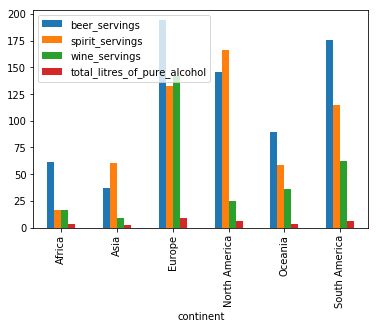

In [14]:
drinks.groupby('continent').mean().plot(kind='bar')

In [ ]:
# how to display the groups?
g = drinks.groupby('continent')
for continent, continent_df in g:
    print(continent)
    print(continent_df)

In [17]:
# to get the specific dataframe
g.get_group('Africa').head()

country  beer_servings  spirit_servings  wine_servings  \
2        Algeria             25                0             14   
4         Angola            217               57             45   
18         Benin             34                4             13   
22      Botswana            173               35             35   
26  Burkina Faso             25                7              7   

    total_litres_of_pure_alcohol continent  
2                            0.7    Africa  
4                            5.9    Africa  
18                           1.1    Africa  
22                           5.4    Africa  
26                           4.3    Africa

In [19]:
# The concept is of split, apply and combine
drinks.groupby('continent').agg('max')  # groupby is split, agg is apply and max is combine

country  beer_servings  spirit_servings  wine_servings  \
continent                                                                      
Africa               Zimbabwe            376              152            233   
Asia                    Yemen            247              326            123   
Europe         United Kingdom            361              373            370   
North America             USA            285              438            100   
Oceania               Vanuatu            306              254            212   
South America       Venezuela            333              302            221   

               total_litres_of_pure_alcohol  
continent                                    
Africa                                  9.1  
Asia                                   11.5  
Europe                                 14.4  
North America                          11.9  
Oceania                                10.4  
South America                           8.3

In [21]:
# gives all the detaiils
g.describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                             spirit_servings              ...    \
                  75%    max           count        mean  ...     
continent                                                 ...     
Africa          76.00  376.0            53.0   16.339623  ...     
Asia            60.50  247.0            44.0   60.840909  ...     
Europe         270.00  361.0            45.0  132.555556  ...     
North America  198.00  285.0            23.0  165.739130  ...     
Oceania        125.75  306.0            16.0   58.437500  ...     
South America  198.00  333.0            12.0  114.750000  ...     

              total_litres_of_pure_alcohol       wine_servings              \
                                       75%   max         count        mean   
continent                                                                    
Africa                               4.700   9.1          53.0   16.264151   
Asia                                 2.425  11.5          44.0    9.068182   
Europe                              10.900  14.4          45.0  142.222222   
North America                        7.000  11.9          23.0   24.521739   
Oceania                              6.150  10.4          16.0   35.625000   
South America                        7.375   8.3          12.0   62.416667   

                                                           
                     std  min   25%    50%     75%    max  
continent                                                  
Africa         38.846419  0.0   1.0    2.0   13.00  233.0  
Asia           21.667034  0.0   0.0    1.0    8.00  123.0  
Europe         97.421738  0.0  59.0  128.0  195.00  370.0  
North America  28.266378  1.0   5.0   11.0   34.00  100.0  
Oceania        64.555790  0.0   1.0    8.5   23.25  212.0  
South America  88.620189  1.0   3.0   12.0   98.50  221.0  

[6 rows x 32 columns]

continent
Africa           AxesSubplot(0.125,0.125;0.775x0.755)
Asia             AxesSubplot(0.125,0.125;0.775x0.755)
Europe           AxesSubplot(0.125,0.125;0.775x0.755)
North America    AxesSubplot(0.125,0.125;0.775x0.755)
Oceania          AxesSubplot(0.125,0.125;0.775x0.755)
South America    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

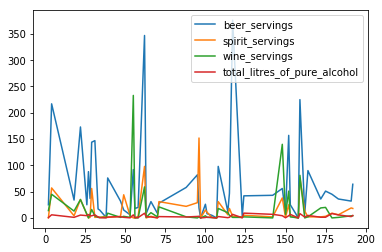

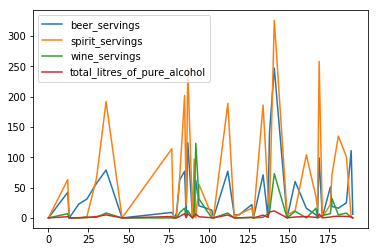

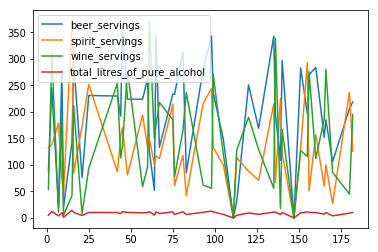

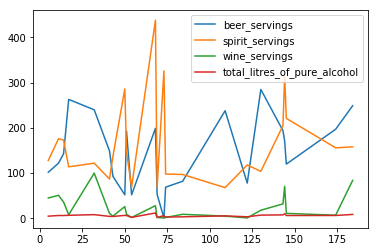

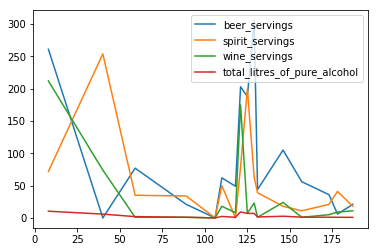

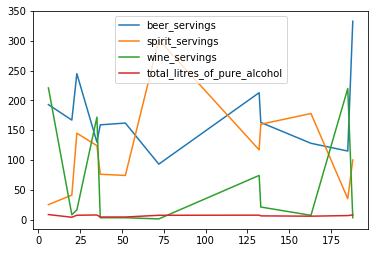

In [23]:
%matplotlib inline
g.plot()

# ib_insync

In [ ]:
#***          Start ib_insync (run once)       *****
#_______________________________________________

from ib_insync import *
util.startLoop()
# ib = IB().connect('127.0.0.1', 3000, clientId=0) # kavi tws live
# ib = IB().connect('127.0.0.1', 3000, clientId=0) # kavi IBG live

# ib = IB().connect('127.0.0.1', 1300, clientId=0) # rkv tws live
# ib = IB().connect('127.0.0.1', 1300, clientId=0) # rkv IBG live


## Paths and Variables

In [ ]:
#******         Paths and variables         ****
#_______________________________________________

datapath = r'./zdata/'

## Error catching in list comprehension

In [ ]:
#******   Error catch in list comprehension  ****
#________________________________________________

def catch(func, handle=lambda e : e, *args, **kwargs):
    '''List comprehension error catcher'''
    try:
        return func(*args, **kwargs)
    except Exception as e:
        pass

# Get Standard Deviation for an NSE scrip
This function gets price for NSE scrips from IBKR

In [ ]:
#... Get the scrip
symbol = 'RELIANCE'
contract = ib.qualifyContracts(Stock(symbol, exchange))[0]

#... Get stdev, hi52 and lo52
duration = '12 M'
size = '1 day'
bars = ib.reqHistoricalData(contract=contract, endDateTime='', 
                     durationStr=duration, barSizeSetting=size, 
                     whatToShow='TRADES', useRTH=True, 
                     formatDate=1, keepUpToDate=True)

stDev = np.std(a=[b.close for b in bars], ddof=0)

hi52 = max([b.high for b in bars])
lo52 = min([b.low for b in bars])

meanPrice = np.mean([b.close for b in bars])

# Get option prices with greeks (via tickers)
The best way to extract greeks and prices for options is to get them through the option chain and expiries as follows...

In [ ]:
#... Get the scrip
symbol = 'RELIANCE'
contract = ib.qualifyContracts(Stock(symbol, exchange))[0]

#... Get the option chain tickers
chains = ib.reqSecDefOptParams(underlyingSymbol=contract.symbol, 
                      futFopExchange='', 
                      underlyingConId=contract.conId, underlyingSecType=contract.secType)

expiries = set(*[c.expirations for c in chains])

cds = [ib.reqContractDetails(Option(symbol, e, exchange='NSE')) for e in expiries]

options = [c.contract for cs in cds for c in cs]

tickers = [t for i in range(0, len(options), 100) for t in ib.reqTickers(*options[i:i + 100])]    
ib.sleep(5)   # gives some time to fill the tickers    
tickers = [t for i in range(0, len(options), 100) for t in ib.reqTickers(*options[i:i + 100])]

# keep only those tickers with underlying prices
lib_t = {t: utils.catch(lambda: t.modelGreeks.undPrice) for t in tickers}
und_t = [k for k, v in lib_t.items() if v is not None]